In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# read clean electricity data to create target variable array y
elec = pd.read_csv('../data/elec_clean.csv',index_col=0)
elec.index = pd.to_datetime(elec.index,format='%Y-%m-%d %H:00:00')

# remove Davenport for now because it is missing most of June and July
elec.drop('Davenport',axis=1,inplace=True)

agg = pd.Series(elec.sum(axis=1))

In [131]:
num_days = 20
start = '2018-02-01 09:00:00'
split_times = pd.date_range(start=start,freq='D',periods=num_days)
X_train_list, y_train_list = list(), list()

for k in range(num_days):
    X_train_entry = np.array(agg[split_times[k]-pd.Timedelta(hours=168):split_times[k]-pd.Timedelta(hours=1)])
    y_train_entry = np.array(agg[split_times[k]:split_times[k]+pd.Timedelta(hours=38)])
    X_train_list.append(X_train_entry)
    y_train_list.append(y_train_entry)

X_train = np.array(X_train_list).reshape(num_days,168)
y_train = np.array(y_train_list).reshape(num_days,39)

In [132]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=168))
model.add(Dense(39))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

In [133]:
# create evaluation data
num_days = 5
start = '2018-02-22 09:00:00'
split_times = pd.date_range(start=start,freq='D',periods=num_days)
X_test_list, y_test_list = list(), list()

for k in range(num_days):
    X_test_entry = np.array(agg[split_times[k]-pd.Timedelta(hours=168):split_times[k]-pd.Timedelta(hours=1)])
    y_test_entry = np.array(agg[split_times[k]:split_times[k]+pd.Timedelta(hours=38)])
    X_test_list.append(X_test_entry)
    y_test_list.append(y_test_entry)

X_test = np.array(X_test_list).reshape(num_days,168)
y_test = np.array(y_test_list).reshape(num_days,39)

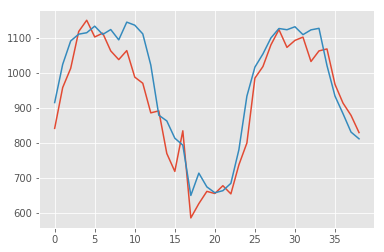

In [128]:
for k in range(num_days):
    y_pred



y_pred = model.predict(X_test).reshape(39,)
y_pred

# X_test.reshape(168,)

plt.plot(y_pred)
plt.plot(y_test.reshape(39,))

In [86]:
# This is working!!!

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the last index of this iteration to check if beyond sequence length
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if (i+n_steps_in+n_steps_out) > len(sequence): break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)  
    return np.array(X), np.array(y)

X, y = split_sequence(agg[:1000].values,168,39)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=168))
model.add(Dense(39))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=2000, verbose=0)

x_input = agg[794:(794+168)].values.reshape(1,168)
y_pred = model.predict(x_input, verbose=0)

plt.plot(agg[794:(794+168)].values)
plt.plot(y_pred.reshape(39,))

In [114]:
X.shape
y.shape

(794, 39)

## Starting over

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# model parameters
num_days = 20
start = '2018-01-10 09:00:00'

# initialize some useful objects for the modeling loop
start_times = pd.date_range(start=start,freq='D',periods=num_days)
forecasts = data.copy(deep=True)

for i in range(num_days):
    y_train = data[k].loc[start_times[i]-pd.Timedelta(hours=168):start_times[i]].values
    
    # train and fit the model
    model = SARIMAX(y_train, order=trend_params,seasonal_order=seasonal_params,enforce_stationarity=False)
    model_fit = model.fit(disp=0,maxiter=200)
    
    # make and store a 39-step-forward forecast
    forecast = model_fit.forecast(steps=39)[15:]
    
    forecasts[k].loc[start_times[i]+pd.Timedelta(hours=15):start_times[i]+pd.Timedelta(hours=38)]=forecast